In [10]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from google.colab import files

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, Dropout
from keras.layers import LSTM, Embedding
from keras.models import Model

uploaded = files.upload()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


Saving data_court.csv to data_court (2).csv


In [25]:
data = pd.read_csv('data_court.csv')
data = data.drop(["Unnamed: 0"], axis =1)
print(data.head())
print(data.shape)

                                             content author
0                                     is it so funny  tree.
1         i have it auto set to the channel i msg in  Niick
2  make sure u change the code when u upload to g...   Alan
3           i tihnk i found what was soft locking it  Niick
4                                use the debugger ig   Alan
(17667, 2)


In [ ]:
data.groupby("author").count()

,content
author,
Alan,1526
Jason4Hear,3098
Niick,7438
jaden,4024
tree.,1581


In [26]:
data = data[data.content.str.split().str.len() > 9]
authors = [ (data["author"] == "Alan"),
           (data["author"] == "Jason4Hear"), 
           (data["author"] == "Niick"),
           (data["author"] == "jaden"),
           (data["author"] == "tree.")
           ]
idx = [0,1,2,3,4]
data["idx"] = np.select(authors,idx)
data = data.sort_values("idx")
# data = data.drop(data.index[417+543:417+543+900])
data = data.drop(data.index[340+431:340+431+508])

data.groupby("author").count()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,content,idx
author,,
Alan,340,340
Jason4Hear,431,431
Niick,600,600
jaden,645,645
tree.,275,275


In [27]:

X,Y=data["content"], data["idx"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)
# for i in range (1334):
  
#   if (Y_train.iloc[i] == 2):
#     Y_train = Y_train.append(pd.Series(Y_train.iloc[i]))
#     X_train = X_train.append(pd.Series(X_train.iloc[i]))


In [28]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

word_to_idx = tokenizer.word_index
V = len(word_to_idx)



In [29]:

T = 190
X_train = pad_sequences(sequences_train, padding = "pre", maxlen=T)
X_test = pad_sequences(sequences_test, padding = "pre", maxlen=T)


In [30]:

#Embedding dim.
D = 140

#Hidden state dim.
M = 110

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M)(x)
# x = Dropout(0.1)(x)
x = Dense(5, activation='softmax')(x)
model = Model(i, x)

# Compile and fit
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True
)

print('Training model...')
r = model.fit(
  X_train,
  Y_train,
  epochs=15,
  validation_data=(X_test, Y_test),
  callbacks = [callback]
)

Training model...
Epoch 1/15
58/58 [==============================] - 16s 222ms/step - loss: 1.4692 - accuracy: 0.3695 - val_loss: 1.3254 - val_accuracy: 0.5054
Epoch 2/15
58/58 [==============================] - 12s 203ms/step - loss: 0.9878 - accuracy: 0.6430 - val_loss: 1.1039 - val_accuracy: 0.5817
Epoch 3/15
58/58 [==============================] - 12s 200ms/step - loss: 0.5257 - accuracy: 0.8417 - val_loss: 1.1542 - val_accuracy: 0.5904
Epoch 4/15
58/58 [==============================] - 12s 202ms/step - loss: 0.2213 - accuracy: 0.9432 - val_loss: 1.3170 - val_accuracy: 0.5948
Epoch 5/15
58/58 [==============================] - 12s 204ms/step - loss: 0.1072 - accuracy: 0.9743 - val_loss: 1.3546 - val_accuracy: 0.6035
Epoch 6/15
58/58 [==============================] - 12s 202ms/step - loss: 0.0889 - accuracy: 0.9836 - val_loss: 1.2823 - val_accuracy: 0.6035
Epoch 7/15
58/58 [==============================] - 12s 202ms/step - loss: 0.0565 - accuracy: 0.9896 - val_loss: 1.3961 - va

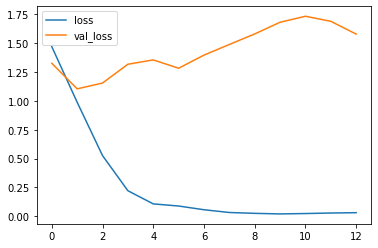

In [31]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

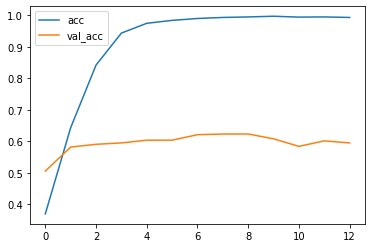

In [32]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[46  1 14 15  4]
 [ 4 48 13 12  4]
 [ 4 10 77 20  3]
 [12 13 14 81  8]
 [ 2  5  6  9 34]]


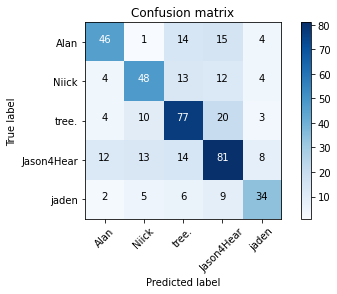

(None,)

In [33]:
# Plot confusion matrix
import itertools 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, model.predict(X_test).argmax(axis=1))
plot_confusion_matrix(cm, ["Alan", "Niick", "tree.", "Jason4Hear", "jaden"]),

In [34]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

In [36]:
model.save('Discord Message Classifier 62%.h5')
!ls

'data_court (1).csv'  'Discord Message Classifier 62%.h5'   tokenizer.pickle
'data_court (2).csv'  'Discord Message Classifier 67%.h5'
 data_court.csv        sample_data
